In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


Shape of 'Unemployment in India': (768, 7)
Shape of 'Unemployment Rate upto 11 2020': (267, 9)

Descriptive statistics for 'Unemployment in India':
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  

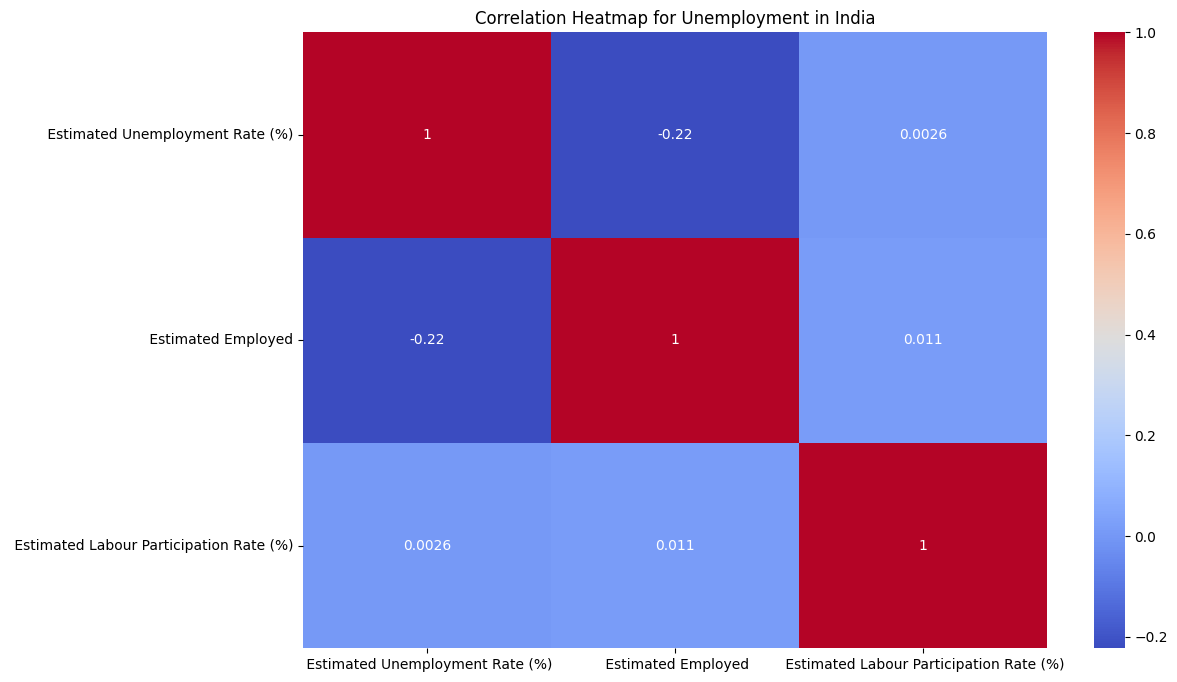

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


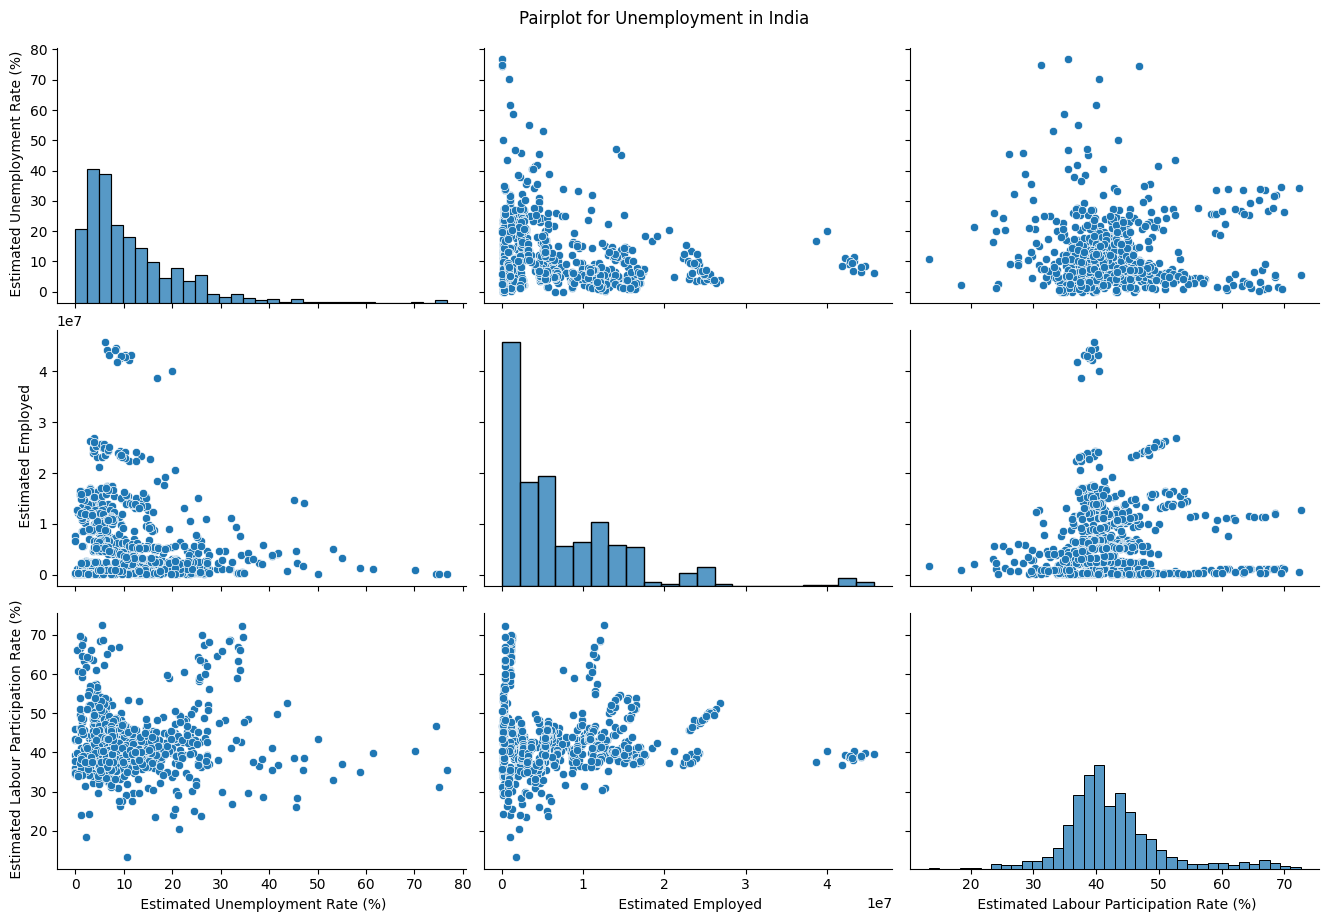

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
unemp_india = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')
unemp_rate_upto_2020 = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

# Display the shape of the data
print("Shape of 'Unemployment in India':", unemp_india.shape)
print("Shape of 'Unemployment Rate upto 11 2020':", unemp_rate_upto_2020.shape)

# Describe the data
print("\nDescriptive statistics for 'Unemployment in India':")
print(unemp_india.describe())

print("\nDescriptive statistics for 'Unemployment Rate upto 11 2020':")
print(unemp_rate_upto_2020.describe())

# Analyze the data
print("\nData info for 'Unemployment in India':")
unemp_india.info()

print("\nData info for 'Unemployment Rate upto 11 2020':")
unemp_rate_upto_2020.info()

# Check for duplicate values
duplicate_count_india = unemp_india.duplicated().sum()
duplicate_count_rate = unemp_rate_upto_2020.duplicated().sum()
print(f"\nNumber of duplicate rows in 'Unemployment in India': {duplicate_count_india}")
print(f"\nNumber of duplicate rows in 'Unemployment Rate upto 11 2020': {duplicate_count_rate}")

# Check for unique values in 'Region' column (if present)
if 'Region' in unemp_india.columns:
    region_value_counts_india = unemp_india['Region'].value_counts()
    print("\nValue counts for 'Region' column in 'Unemployment in India':")
    print(region_value_counts_india)

# Visualizing the data
def plot_bar(x, y, title, xlabel, ylabel, data):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    sns.barplot(x=x, y=y, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plotting Estimated Unemployment Rate (%) by Region for 'Unemployment in India'
if 'Estimated Unemployment Rate (%)' in unemp_india.columns and 'Region' in unemp_india.columns:
    plot_bar('Estimated Unemployment Rate (%)', 'Region', 'Unemployment Rate in India by Region', 'Estimated Unemployment Rate (%)', 'Region', unemp_india)

# Plotting Estimated Employed by Region for 'Unemployment in India'
if 'Estimated Employed' in unemp_india.columns and 'Region' in unemp_india.columns:
    plot_bar('Estimated Employed', 'Region', 'Employment in India by Region', 'Estimated Employed', 'Region', unemp_india)

# Plotting Estimated Labour Participation Rate (%) by Region for 'Unemployment in India'
if 'Estimated Labour Participation Rate (%)' in unemp_india.columns and 'Region' in unemp_india.columns:
    plot_bar('Estimated Labour Participation Rate (%)', 'Region', 'Labour Participation Rate in India by Region', 'Estimated Labour Participation Rate (%)', 'Region', unemp_india)

# Select only numeric columns for correlation matrix
numeric_cols = unemp_india.select_dtypes(include=[np.number]).columns
correlation_matrix_india = unemp_india[numeric_cols].corr()
print("\nCorrelation matrix for 'Unemployment in India':")
print(correlation_matrix_india)

# Heatmap of the correlation matrix for 'Unemployment in India'
plt.figure(figsize=(12, 8))
plt.title('Correlation Heatmap for Unemployment in India')
sns.heatmap(correlation_matrix_india, annot=True, cmap='coolwarm')
plt.show()

# Pairplot to visualize pairwise relationships in 'Unemployment in India'
sns.pairplot(unemp_india, height=3, aspect=1.5)
plt.suptitle('Pairplot for Unemployment in India', y=1.02)
plt.show()

# Histograms for distribution of key variables in 'Unemployment in India'
def plot_histogram(column, title, xlabel, data):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    sns.histplot(data[column], kde=True)
    plt.xlabel(xlabel)
    plt.show()

# Plot histograms if the columns exist
if 'Estimated Unemployment Rate (%)' in unemp_india.columns:
    plot_histogram('Estimated Unemployment Rate (%)', 'Distribution of Estimated Unemployment Rate (%)', 'Estimated Unemployment Rate (%)', unemp_india)
if 'Estimated Employed' in unemp_india.columns:
    plot_histogram('Estimated Employed', 'Distribution of Estimated Employed', 'Estimated Employed', unemp_india)
if 'Estimated Labour Participation Rate (%)' in unemp_india.columns:
    plot_histogram('Estimated Labour Participation Rate (%)', 'Distribution of Estimated Labour Participation Rate (%)', 'Estimated Labour Participation Rate (%)', unemp_india)

# Train a simple linear regression model for 'Unemployment in India'
# Predict 'Estimated Unemployment Rate (%)' based on 'Estimated Employed'
if 'Estimated Employed' in unemp_india.columns and 'Estimated Unemployment Rate (%)' in unemp_india.columns:
    X = unemp_india[['Estimated Employed']]
    y = unemp_india['Estimated Unemployment Rate (%)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nLinear Regression Model Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plot the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.xlabel('Estimated Employed')
    plt.ylabel('Estimated Unemployment Rate (%)')
    plt.legend()
    plt.show()


### Summary:

Here’s a summary of the insights from the pairplot:

### Histograms:
- **Estimated Unemployment Rate (%)**: The histogram reveals a right-skewed distribution. Most of the observations are concentrated between 0% and 20%, with a few outliers extending up to 80%.
- **Estimated Employed**: This histogram shows that most of the values lie below (1x10^7), with a steep drop-off as the values increase, indicating a left-skewed distribution.
- **Estimated Labour Participation Rate (%)**: The distribution is relatively normal with a peak around 40%-50%, tapering off on both ends.

### Scatter Plots:
- **Estimated Unemployment Rate (%) vs. Estimated Employed**: There is a noticeable negative correlation. As the number of estimated employed increases, the unemployment rate tends to decrease, suggesting that higher employment is associated with lower unemployment rates.
- **Estimated Unemployment Rate (%) vs. Estimated Labour Participation Rate (%)**: This plot shows a somewhat positive relationship with significant dispersion. Higher labour participation rates are associated with higher unemployment rates, but there is considerable variability.
- **Estimated Employed vs. Estimated Labour Participation Rate (%)**: This plot suggests a clustered relationship with no clear linear pattern, indicating that the labour participation rate does not directly predict the number of employed individuals.

### Key Observations:
1. **Negative Correlation between Unemployment Rate and Employment**: The more people are employed, the lower the unemployment rate, which is an expected economic outcome.
2. **Complex Relationship between Unemployment Rate and Labour Participation**: High labour participation does not necessarily mean low unemployment; it might also indicate that more people are actively seeking jobs, thereby increasing the unemployment rate if job opportunities are insufficient.
3. **Distribution Patterns**: The distinct distributions for each variable highlight varying economic conditions across different regions or time periods covered in the dataset.

